# Load Data

In [463]:
import numpy as np
import glob
import copy
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch.optim as optim
from sklearn.metrics import accuracy_score
import copy
import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.utils.data import DataLoader, TensorDataset
from imblearn.over_sampling import SMOTE
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import f1_score
from collections import Counter
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

In [464]:
birds_labels = {
    "other": 0,
    "comcuc": 1,
    "cowpig1": 2,
    "eucdov": 3,
    "eueowl1": 4,
    "grswoo": 5,
    "tawowl1": 6
}

birds = [bird for bird in list(birds_labels.keys()) if bird != "other"]

In [465]:
def unique_rows(matrix):
    indexes = []
    labels = []
    
    for i, row in enumerate(matrix):
        if np.unique(row).size == 1:
            indexes.append(i)
            labels.append(np.unique(row)[0])
    
    indexes = np.array(indexes)
    labels = np.array(labels)
    
    return indexes, labels

In [466]:
def load_data(bird):
    labels = []
    features = []
    bird_id = birds_labels[bird]
    
    path = f'./data/{bird}/'
    labels_files = glob.glob(path + '*labels.npy')
    counter = None
    
    for i, file in enumerate(labels_files):
        print(f'{bird}: {i + 1}/{len(labels_files)}', end='\r')
        counter = i
        data_id = path + ''.join(file.split(".labels.npy")).split('/')[-1] + '.npy'
        
        annotations = np.load(file)
        feature = np.load(data_id)
        
        ind, label = unique_rows(annotations)
        
        if len(ind) == 0:
            continue
        
        labels.append(label)
        features.append(feature[ind])

    print('\n')
    labels = np.concatenate(labels)
    features = np.concatenate(features)
    
    return labels, features

In [467]:
X = []
y = []

for bird in birds:
    labels, features = load_data(bird)
    X.append(features)
    y.append(labels)
    
X = np.concatenate(X)
y = np.concatenate(y)

comcuc: 200/200

cowpig1: 200/200

eucdov: 200/200

eueowl1: 200/200

grswoo: 200/200

tawowl1: 200/200



In [468]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X = X[y != 0].copy()
y = np.delete(y, np.where(y == 0)) - 1

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
model = SelectFromModel(clf, prefit=True, max_features=128)
model.get_support()

# X = model.transform(X)

array([ True, False,  True, False, False,  True,  True, False,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,

In [469]:
np.where(model.get_support())

(array([  0,   2,   5,   6,   8,   9,  10,  13,  15,  16,  17,  18,  19,
         20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
         34,  35,  36,  37,  38,  39,  40,  41,  45,  71,  72,  73,  74,
         75,  79,  80,  81,  82,  83,  84,  85,  96, 108, 109, 122, 137,
        138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
        152, 153, 154, 155, 156, 196, 236, 237, 258, 264, 268, 270, 271,
        272, 273, 278, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294,
        295, 296, 297, 301, 302, 304, 307, 314, 345, 346, 347, 348, 349,
        350, 351, 364, 376, 410, 411, 412, 413, 414, 415, 416, 417, 418,
        419, 422, 502, 503, 522, 523, 536, 537, 538, 539, 544]),)

# Dimensionality Reduction

In [418]:
# X_hier = X.copy()
# y_hier = np.where(y == 0, 0, 1)

# X_train = X_hier[y_hier == 0]
# X_train.shape

# X_train_a = X_hier[y_hier == 1]
# X_train_a.shape

In [419]:
from sklearn.decomposition import PCA

In [420]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)
reduced_data.shape

(18494, 2)

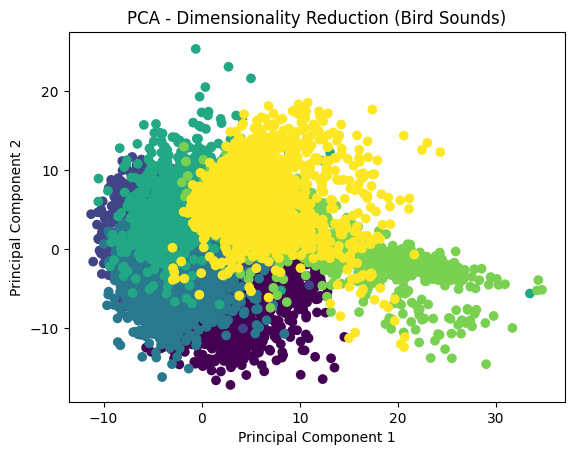

In [421]:
# Plot the reduced data
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c = y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Dimensionality Reduction (Bird Sounds)')

plt.show()

In [263]:
X.shape

(85500, 548)